In [1]:
# To support both python 2 and python 3
# 让这份笔记同步支持 python 2 和 python 3
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
#使用patsy便于生成模型
import patsy

# An Overview of Statistical Learning

**Wage Data**

In [3]:
Wage = pd.read_csv("data/Wage.csv")
Wage.head()

,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


**FIGURE 1.1**

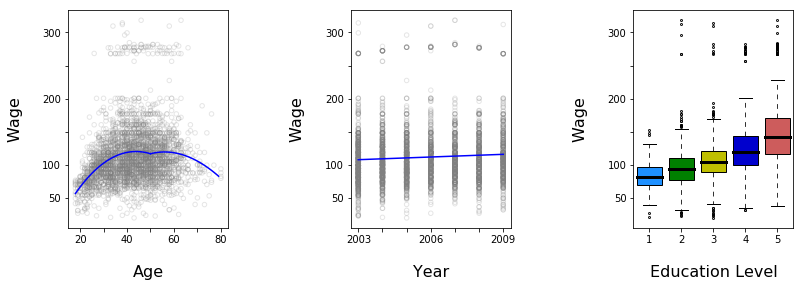

In [4]:
fig = plt.figure(figsize=(13,4))
# 利用网格确定图形的位置
from matplotlib.gridspec import GridSpec
gs = GridSpec(12, 13) 
ax1 = fig.add_subplot(gs[:, :3])
plt.scatter(Wage.age,Wage.wage,color='',edgecolors='gray', marker='o',s=20,alpha = 0.2)
#从原图形形状来看接近图7-3的限定多项式在age = 50处连续的多项式
def patsy_model_poly(factor,degree = 2):
    model_poly = factor
    for i in range(2,degree + 1):
        model_poly = model_poly + '+ I(' + factor +  '**{})'.format(str(i))
    return model_poly
agelims = np.arange(Wage['age'].min(),Wage['age'].max())
age_grid  = pd.DataFrame(agelims,columns = ['age'])
Wage_young = Wage[Wage['age'] < 50]
Wage_old = Wage[Wage['age'] >= 50]
age_grid_young = age_grid[age_grid['age'] <= 50]
age_grid_old = age_grid[age_grid['age'] >= 50]
fit1_young = smf.ols('wage ~{}'.format(patsy_model_poly('age',3)),data = Wage_young).fit()
boundary_value = fit1_young.predict({'age':50})[0]
constraints_condition = 'Intercept + age * 50 + I(age ** 2) * 2500 + I(age ** 3) * 125000 = {}'.format(boundary_value)
#注意只有glm可以使用fit_constrained
fit1_old = smf.glm('wage ~{}'.format(patsy_model_poly('age',3)),data = Wage_old).fit_constrained(constraints_condition)
preds1_young = fit1_young.predict(age_grid_young)
preds1_old = fit1_old.predict(age_grid_old)
plt.plot(age_grid_young,preds1_young,'b')
plt.plot(age_grid_old,preds1_old,'b')
plt.xticks(np.linspace(20,80,7),[20,'',40,'',60,'',80])
plt.yticks(np.linspace(50,300,6),[50,100,'',200,'',300])
plt.xlabel('Age' ,fontsize=16,labelpad=20)
plt.ylabel('Wage' ,fontsize=16,labelpad=20)

ax2 = fig.add_subplot(gs[:, 5:8])
plt.scatter(Wage.year,Wage.wage,color='',edgecolors='gray', marker='o',s=20,alpha = 0.2)
fit_year = smf.ols('wage ~ year',data = Wage).fit()
year_grid = pd.DataFrame(np.linspace(Wage['year'].min(),Wage['year'].max(),20),columns = ['year'])
preds_year = fit_year.predict(year_grid)
plt.plot(year_grid,preds_year,'b')
plt.xticks(np.linspace(2003,2009,7),[2003,'','',2006,'','',2009])
plt.yticks(np.linspace(50,300,6),[50,100,'',200,'',300])
plt.xlabel('Year' ,fontsize=16,labelpad=20)
plt.ylabel('Wage' ,fontsize=16,labelpad=20)

ax3 = fig.add_subplot(gs[:, 10:13])
educationlims = ['1. < HS Grad','2. HS Grad','3. Some College','4. College Grad','5. Advanced Degree']
data_education = [Wage[Wage['education'] == x].wage for x in educationlims]
bp = plt.boxplot(data_education, patch_artist = True ,widths=0.8,labels = [1,2,3,4,5])
bp['boxes'][0].set(facecolor = 'dodgerblue' )
bp['boxes'][1].set(facecolor = 'green' )
bp['boxes'][2].set(facecolor = 'y' )
bp['boxes'][3].set(facecolor = 'mediumblue' )
bp['boxes'][4].set(facecolor = 'indianred' )
plt.setp(bp['fliers'], marker='o',color='Black',markersize = 2, linewidth=0.5,alpha = 0.9)
plt.setp(bp['whiskers'], color='k', linewidth=0.8,linestyle=(0,(6,6)))
plt.setp(bp['medians'], color='Black', linewidth=3)

plt.yticks(np.linspace(50,300,6),[50,100,'',200,'',300])
plt.xlabel('Education Level' ,fontsize=16,labelpad=20)
plt.ylabel('Wage' ,fontsize=16,labelpad=20)
plt.show()

**Stock Market Data**

In [5]:
Smarket = pd.read_csv("data/Smarket.csv")
Smarket.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


**FIGURE 1.2**

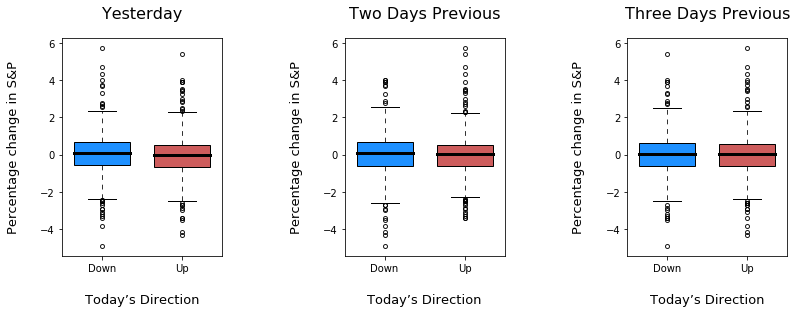

In [6]:
def show_bp_fig(orgin_data,column_value,title):
    data = [orgin_data[orgin_data['Direction'] == x][column_value] for x in ['Down','Up']]
    bp = plt.boxplot(data, patch_artist = True ,widths=0.7,labels = ['Down','Up'])
    bp['boxes'][0].set(facecolor = 'dodgerblue' )
    bp['boxes'][1].set(facecolor = 'indianred' )
    plt.setp(bp['fliers'], marker='o',color='Black',markersize = 4, linewidth=0.5,alpha = 0.9)
    plt.setp(bp['whiskers'], color='k', linewidth=0.8,linestyle=(0,(6,6)))
    plt.setp(bp['medians'], color='Black', linewidth=3)
    plt.xlabel('Today’s Direction' ,fontsize=13,labelpad=20)
    plt.ylabel('Percentage change in S&P' ,fontsize=13,labelpad=20)
    plt.title(title,fontsize=16,pad=20)

fig = plt.figure(figsize=(13,4))
gs = GridSpec(12, 13) 
ax1 = fig.add_subplot(gs[:, :3])
show_bp_fig(Smarket,'Lag1','Yesterday')
ax2 = fig.add_subplot(gs[:, 5:8])
show_bp_fig(Smarket,'Lag2','Two Days Previous')
ax3 = fig.add_subplot(gs[:, 10:13])
show_bp_fig(Smarket,'Lag3','Three Days Previous')
plt.show()

**FIGURE 1.3**

In [7]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis(store_covariance=True)
Smarket_Train = Smarket[Smarket['Year'] < 2005]
Smarket_2005 = Smarket[Smarket['Year'] == 2005]
y_train, X_train = patsy.dmatrices('Direction ~0 + Lag1+Lag2', data = Smarket_Train,return_type="dataframe")
y_test, X_test = patsy.dmatrices('Direction ~0 + Lag1+Lag2', data = Smarket_2005,return_type="dataframe")
qda.fit(X_train,y_train['Direction[Up]'])

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=True, store_covariances=None, tol=0.0001)

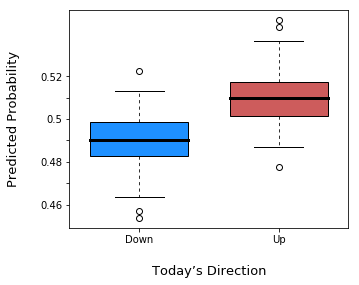

In [8]:
plt.figure(figsize=(5,4))
bp = plt.boxplot([qda.predict_proba(X_test)[:,0],qda.predict_proba(X_test)[:,1]], patch_artist = True ,widths=0.7,labels = ['Down','Up'])
bp['boxes'][0].set(facecolor = 'dodgerblue' )
bp['boxes'][1].set(facecolor = 'indianred' )
plt.setp(bp['whiskers'], color='k', linewidth=0.8,linestyle=(0,(4,4)))
plt.setp(bp['medians'], color='Black', linewidth=3)
plt.yticks(np.linspace(0.46,0.52,7),[0.46,'',0.48,'',0.50,'',0.52])
plt.xlabel('Today’s Direction' ,fontsize=13,labelpad=20)
plt.ylabel('Predicted Probability' ,fontsize=13,labelpad=20)
plt.show()

原图的Up应该实际是原始数据的下跌频率，这里不知道是怎么算出来做出箱线图的。

**Gene Expression Data**

In [9]:
nci_data = pd.read_csv('Data/NCI60_data.csv', index_col=0)
nci_labs= pd.read_csv('Data/NCI60_labs.csv').drop('Unnamed: 0',axis = 1)
#nci_labs.index = nci_data.index

**FIGURE 1.4**

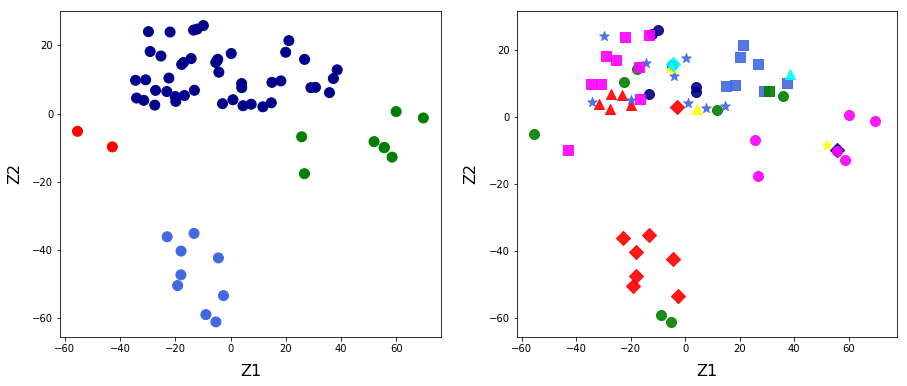

In [10]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
X_Standard = scale(nci_data)
pca = PCA()
pca.fit(X_Standard)
Z = np.c_[pca.transform(X_Standard)[:,0], - pca.transform(X_Standard)[:,1]]
classify_idx = np.empty_like(pca.transform(X_Standard)[:,0])
classify_idx[(Z[:,0] > 20) & ( Z[:,1] < 10)] = 0
classify_idx[(Z[:,0] < -40) & (Z[:,1] < 0)] = 1
classify_idx[(Z[:,1] < -25)] = 2
classify_idx[(Z[:,1] > -5) & (Z[:,0] < 45) & (Z[:,0] > - 40)] = 3
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
color_list = ['green','red','royalblue','darkblue']
cmap = ListedColormap(color_list[:4])
plt.scatter(pca.transform(X_Standard)[:,0],- pca.transform(X_Standard)[:,1], c=classify_idx, cmap=cmap,s = 100)
plt.xlabel('Z1',fontsize = 16,labelpad = 10)
plt.ylabel('Z2',fontsize = 16,labelpad = 10)
plt.subplot(1,2,2)
color_list = ['green','red','royalblue','darkblue','yellow', 'magenta','cyan']
cmap = ListedColormap(color_list[:7])
markers = ('o', '^', 's', 'D', '*')
#markers = ('o', '^', 's', 'x', 'v', 'D', '*')
for idx, cls in enumerate(np.unique(nci_labs)):
        plt.scatter(Z[nci_labs['x'] == cls,0], Z[nci_labs['x'] == cls,1], alpha=0.9, color =cmap(np.mod(idx,7)), s=100,
                            marker=markers[np.mod(idx,5)], label=cls)
plt.xlabel('Z1',fontsize = 16,labelpad = 10)
plt.ylabel('Z2',fontsize = 16,labelpad = 10)
plt.show()